In [1]:
!pip install opendatasets

Defaulting to user installation because normal site-packages is not writeable


In [2]:

import opendatasets as od

In [3]:
dataset = 'https://www.kaggle.com/datasets/csafrit2/maternal-health-risk-data'

In [4]:
od.download(dataset)

Skipping, found downloaded files in ".\maternal-health-risk-data" (use force=True to force download)


In [5]:
import os

In [6]:
data_dir = '.\\maternal-health-risk-data'

In [7]:
os.listdir(data_dir)

['.ipynb_checkpoints',
 'anemia-dataset',
 'blood-sugar-level',
 'brain-stroke-dataset',
 'cholesterol',
 'conversion-predictors-of-cis-to-multiple-sclerosis',
 'Untitled.ipynb']

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [9]:
m_df = pd.read_csv('Maternal Health Risk Data Set.csv')
m_df

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk


In [10]:
m_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [11]:
missing_vals = (m_df.isnull().sum())
print(missing_vals[missing_vals > 0])

Series([], dtype: int64)


In [12]:
m_df = m_df.dropna()
m_df.shape
m_df.head

<bound method NDFrame.head of       Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate  RiskLevel
0      25         130           80  15.0      98.0         86  high risk
1      35         140           90  13.0      98.0         70  high risk
2      29          90           70   8.0     100.0         80  high risk
3      30         140           85   7.0      98.0         70  high risk
4      35         120           60   6.1      98.0         76   low risk
...   ...         ...          ...   ...       ...        ...        ...
1009   22         120           60  15.0      98.0         80  high risk
1010   55         120           90  18.0      98.0         60  high risk
1011   35          85           60  19.0      98.0         86  high risk
1012   43         120           90  18.0      98.0         70  high risk
1013   32         120           65   6.0     101.0         76   mid risk

[1014 rows x 7 columns]>

In [13]:
before = m_df.shape[0]
m_df = m_df.drop_duplicates()
after = m_df.shape[0]
print ("Number of duplicate rows removed = ", before - after)
print ("Number of rows after removing duplicate = " , after)

Number of duplicate rows removed =  562
Number of rows after removing duplicate =  452


In [14]:
h = m_df.head(10)
print(h)

   Age  SystolicBP  DiastolicBP     BS  BodyTemp  HeartRate  RiskLevel
0   25         130           80  15.00      98.0         86  high risk
1   35         140           90  13.00      98.0         70  high risk
2   29          90           70   8.00     100.0         80  high risk
3   30         140           85   7.00      98.0         70  high risk
4   35         120           60   6.10      98.0         76   low risk
5   23         140           80   7.01      98.0         70  high risk
6   23         130           70   7.01      98.0         78   mid risk
7   35          85           60  11.00     102.0         86  high risk
8   32         120           90   6.90      98.0         70   mid risk
9   42         130           80  18.00      98.0         70  high risk


In [15]:
t = m_df.tail(10)
print(t)

     Age  SystolicBP  DiastolicBP   BS  BodyTemp  HeartRate RiskLevel
668   15          90           49  6.7      99.0         77  low risk
669   15          90           49  6.0      99.0         77  low risk
670   10         100           50  6.0      99.0         70  mid risk
671   15         100           49  6.8      99.0         77  low risk
672   15         100           49  6.0      99.0         77  low risk
673   12         100           50  6.4      98.0         70  mid risk
674   15         100           60  6.0      98.0         80  low risk
703   15         100           49  7.6      98.0         77  low risk
704   12         100           50  6.0      98.0         70  mid risk
705   21         100           50  6.8      98.0         60  low risk


In [16]:
sliced_m_df = pd.concat([h, t])
print(sliced_m_df)


     Age  SystolicBP  DiastolicBP     BS  BodyTemp  HeartRate  RiskLevel
0     25         130           80  15.00      98.0         86  high risk
1     35         140           90  13.00      98.0         70  high risk
2     29          90           70   8.00     100.0         80  high risk
3     30         140           85   7.00      98.0         70  high risk
4     35         120           60   6.10      98.0         76   low risk
5     23         140           80   7.01      98.0         70  high risk
6     23         130           70   7.01      98.0         78   mid risk
7     35          85           60  11.00     102.0         86  high risk
8     32         120           90   6.90      98.0         70   mid risk
9     42         130           80  18.00      98.0         70  high risk
668   15          90           49   6.70      99.0         77   low risk
669   15          90           49   6.00      99.0         77   low risk
670   10         100           50   6.00      99.0 

<Axes: xlabel='SystolicBP', ylabel='DiastolicBP'>

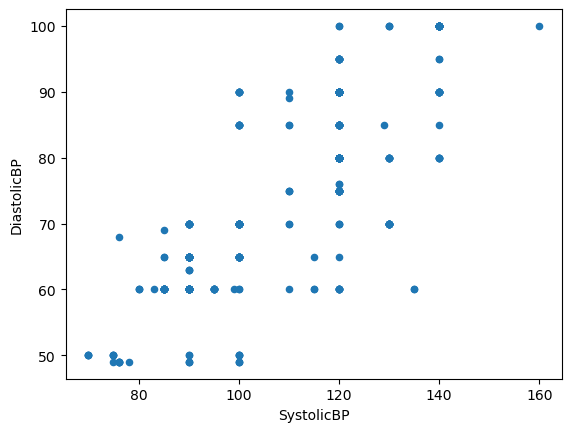

In [17]:
m_df.plot.scatter(x = 'SystolicBP', y= 'DiastolicBP')

<Axes: xlabel='HeartRate'>

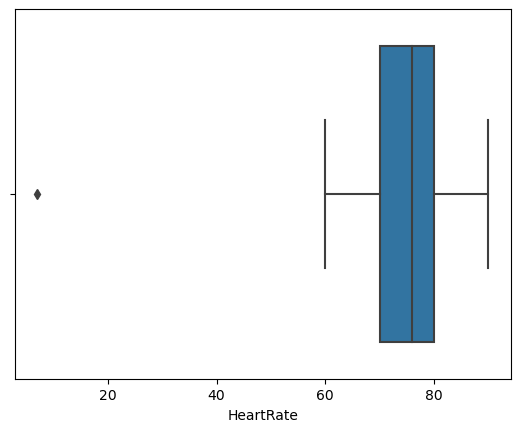

In [18]:
sns.boxplot(x ='HeartRate', data= m_df)

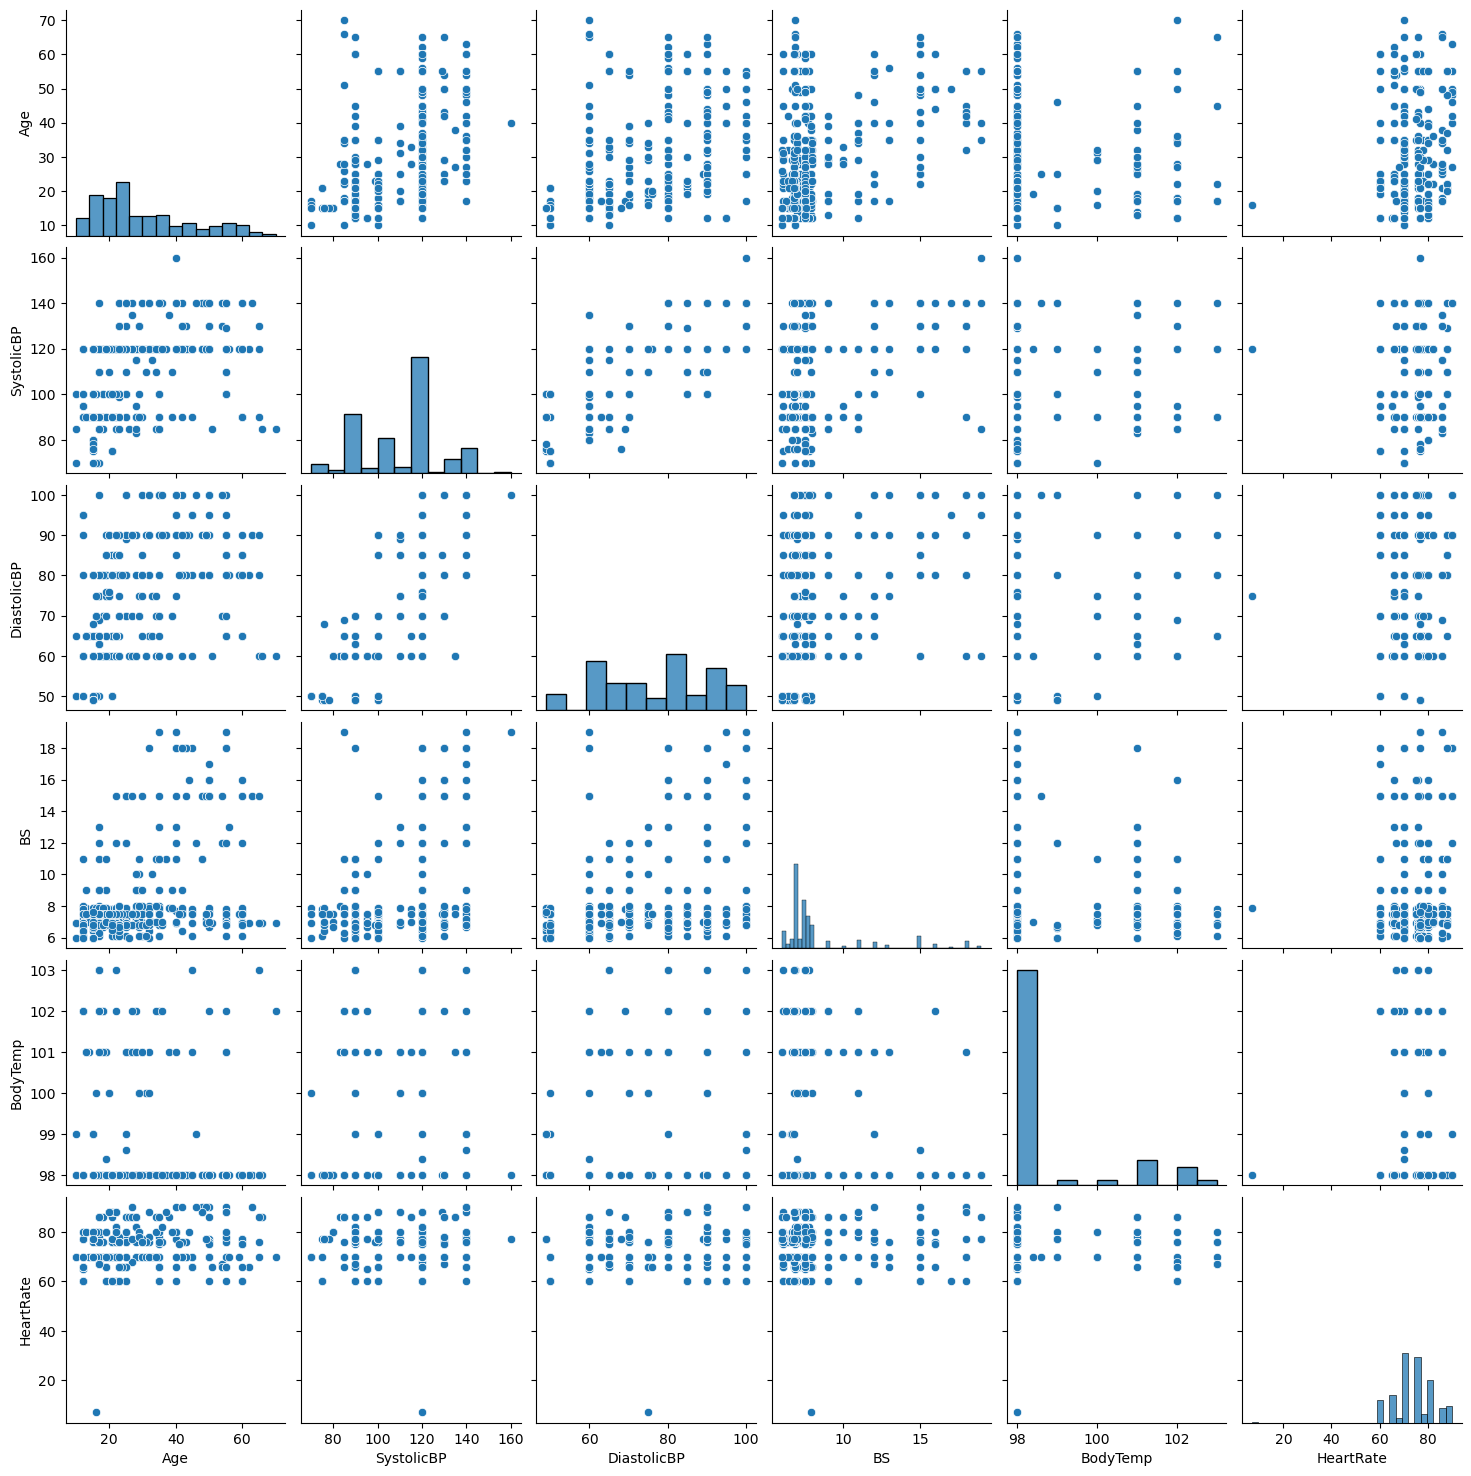

In [19]:
sns.pairplot(m_df)

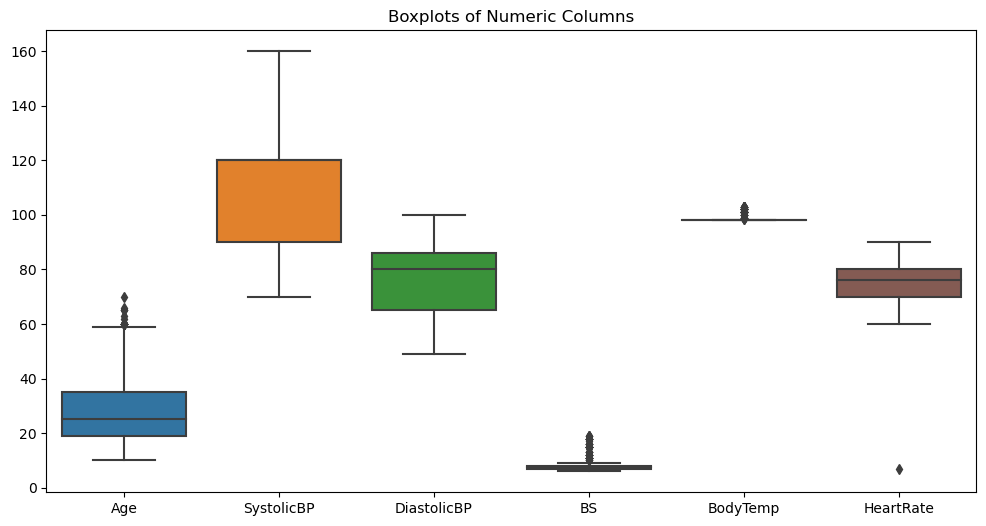

Rows with potential outliers:
     Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate  RiskLevel
0     25         130           80  15.0      98.0         86  high risk
1     35         140           90  13.0      98.0         70  high risk
2     29          90           70   8.0     100.0         80  high risk
7     35          85           60  11.0     102.0         86  high risk
9     42         130           80  18.0      98.0         70  high risk
..   ...         ...          ...   ...       ...        ...        ...
668   15          90           49   6.7      99.0         77   low risk
669   15          90           49   6.0      99.0         77   low risk
670   10         100           50   6.0      99.0         70   mid risk
671   15         100           49   6.8      99.0         77   low risk
672   15         100           49   6.0      99.0         77   low risk

[169 rows x 7 columns]


In [20]:
numeric_columns = m_df.select_dtypes(include=['float64', 'int64']).columns

# Create boxplots to visualize potential outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=m_df[numeric_columns])
plt.title('Boxplots of Numeric Columns')
plt.show()

# Calculate the IQR for each numeric column
Q1 = m_df[numeric_columns].quantile(0.25)
Q3 = m_df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

# Identify potential outliers using the IQR method
outliers = ((m_df[numeric_columns] < (Q1 - 1.5 * IQR)) | (m_df[numeric_columns] > (Q3 + 1.5 * IQR))).any(axis=1)

# Display rows with potential outliers
outliers_data = m_df[outliers]
print("Rows with potential outliers:")
print(outliers_data)

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load your dataset
data = pd.read_csv('Maternal Health Risk Data Set.csv')

# Prepare the data
X = data.drop(columns=['RiskLevel'])  # Features
y = data['HeartRate']  # Target variable

# Binarize the target variable (for example, convert to binary classes)
y_binary = (y > y.median()).astype(int)  # For simplicity, median value is used as threshold

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions (considering a threshold for binary classification)
y_pred = (model.predict(X_test) > 0.5).astype(int)

# Calculate classification metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.8916256157635468
Precision: 0.8780487804878049
Recall: 0.8571428571428571
F1 Score: 0.8674698795180722


In [26]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8916256157635468
Precision: 0.8914012052631212
Recall: 0.8916256157635468
F1 Score: 0.8914243179615011


In [27]:
m_df.drop(['RiskLevel'], axis=1, inplace=True)
print(m_df.columns)

Index(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate'], dtype='object')


C:\Users\JAYSI\AppData\Local\Temp\ipykernel_5308\2134031722.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  m_df.drop(['RiskLevel'], axis=1, inplace=True)


In [28]:
x = m_df.iloc[:, 0:8].values
print(x)

[[ 25.  130.   80.   15.   98.   86. ]
 [ 35.  140.   90.   13.   98.   70. ]
 [ 29.   90.   70.    8.  100.   80. ]
 ...
 [ 15.  100.   49.    7.6  98.   77. ]
 [ 12.  100.   50.    6.   98.   70. ]
 [ 21.  100.   50.    6.8  98.   60. ]]


In [29]:
y = m_df.iloc[:, -1].values
print(y)

[86 70 80 70 76 70 78 86 70 70 76 70 77 70 88 70 90 80 76 70 90 70 76 70
 76 80 66 70 77 82 88 66 82 77 70 60 75 66 66 66 88 60 80 70 70 70 70 76
 77 70 66 80 60 60 77 70 70 70 76 77 70 80 77 80 76 78 86 70 76 86 78 67
 80 70 76 70 78 86 76 70 65 70 76 70 76 80 66 66 82 60 80 60 86 70 78 60
 77 66 66 90 80 70 86 90 78 60 86 80 70 90 80 76 90 88 90 80 77 88 66 66
 77 80 80 60 60 75 76 78 76 70 80 76 70 80 76 77 88 76 70 76 80 70 65 70
 80 88 76 80 66 66 60 80 67 86 70 78 86 70 86 70 77 80 76 77 76 70 78 70
 80 76 70 76 70 76 80 70 65 70 80 88 76 80 76 70 76 80 66 70 77 82 66 88
 66 82 77 66 60 60 76 75 66 66 66 88 80 60 67 70 80 70 76 70 86 70 70 76
 77 70 70 66 80 60 60 60 77 76 75 66 66 66 88 80 60 86 70 80 70 76 70 78
 86 70 70 76 70 70 70 76 80 70 76 77 76 76 80 80 88 76 80 77 66 60 60 75
 66 66 66 88 67 80 70 70 86 70 70 76 77 70 70 66 80 60 60 88 60 60 60 78
 76 68 77 80 66 80 80 77 76 77 60 80 66 77 77 60 86 70 80 70 76 78 70 70
 76 77 70 70 80 70 70 76 70 88 76 70 76 76 77 70 70

In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
print(x_train)

[[ 15.  120.   80.    7.8  98.   70. ]
 [ 20.  100.   90.    7.   98.   88. ]
 [ 22.   90.   65.    6.9  98.   78. ]
 ...
 [ 32.  140.   90.   18.   98.   88. ]
 [ 23.   90.   60.    7.5  98.   76. ]
 [ 21.  100.   85.    6.9  98.   70. ]]


In [31]:
print(y_train)

[70 88 78 70 60 66 86 60 80 76 70 66 75 60 88 70 86 66 77 86 76 88 60 76
 67 80 86 86 76 80 80 70 70 70 66 80 76 66 60 88 90 76 90 80 60 65 76 77
 80 60 77 80 90 66 80 88 66 70 66 76 66 76 76 80 77 77 76 70 70 66 80 80
 70 75 76 76 70 77 67 77 70 70 70 70 66 77 76 70 76 90 60 66 82 80 66 78
 80 77 77 70 77 70 80 60 70 86 60 70 80 77 70 86 78 70 82 76 76 70 82 80
 70 80 70 77 70 76 77 60 70 76 78 75 86 88 76 70 60 80 70 82 77 66 80 70
 77 70 80 66 67 90 80 90 70 76 76 66 77 70 80 80 70 76 80 75 76 70 70 75
 80 60 86 76  7 70 76 80 70 76 67 65 70 80 70 70 66 66 75 80 76 60 70 66
 70 70 70 60 60 60 77 70 80 70 70 70 86 66 86 66 86 60 80 88 78 86 60 82
 76 86 70 77 70 70 66 66 66 70 70 76 78 76 86 70 60 76 88 76 80 66 80 60
 76 88 66 76 80 70 88 76 60 70 80 60 90 70 75 66 70 60 77 76 77 77 70 88
 77 80 70 66 66 82 78 80 70 76 88 60 80 60 70 70 90 70 70 60 76 80 80 66
 80 77 80 70 86 70 80 80 66 82 70 82 82 78 66 66 70 70 70 70 77 66 77 70
 66 88 76 70]


In [32]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform (x_train)
x_test = sc.transform(x_test)

In [33]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [34]:
y_pred = classifier.predict(x_test)

In [35]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          60       1.00      1.00      1.00        10
          65       0.00      0.00      0.00         1
          66       0.20      0.12      0.15         8
          67       1.00      0.50      0.67         2
          68       0.00      0.00      0.00         1
          70       0.69      0.85      0.76        40
          75       0.14      0.50      0.22         2
          76       0.67      0.35      0.46        17
          77       0.54      0.44      0.48        16
          78       1.00      0.43      0.60         7
          80       0.58      0.88      0.70        16
          82       0.00      0.00      0.00         1
          86       1.00      0.89      0.94         9
          88       1.00      1.00      1.00         5
          90       0.50      1.00      0.67         1

    accuracy                           0.67       136
   macro avg       0.56      0.53      0.51       136
weighted avg       0.68   

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [38]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score




precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.6691176470588235
Precision: 0.6795799088866314
Recall: 0.6691176470588235
F1 Score: 0.6520433194154789


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
